In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
def gauss(x, a, m, s):
    return a*np.exp(-(x-m)**2/2/s**2)

def func(x, a1, m1, s1, a2, m2, s2):
    return gauss(x, a1, m1, s1) + gauss(x, a2, m2, s2)

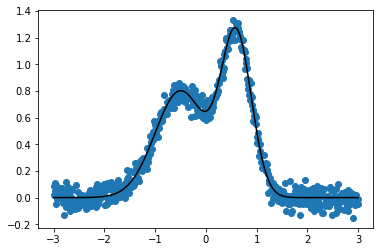

In [3]:
params = [1.2, 0.6, 0.3, 0.8, -0.5, 0.5]
np.random.seed(0)
X = np.linspace(-3, 3, 600)
Y = [func(x ,*params) + np.random.randn()*0.05 for x in X]

plt.scatter(X, Y)
plt.plot(X, [func(x ,*params) for x in X], color='k')
plt.show()

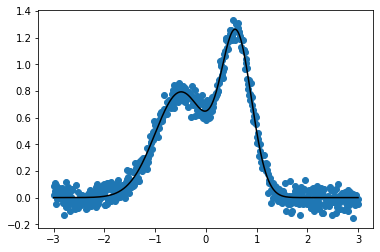

array([ 1.17928341,  0.6032055 ,  0.2985159 ,  0.79138174, -0.49225605,
        0.50903841])

In [4]:
from scipy.optimize import curve_fit as cf
popt, pcov = cf(func, X, Y, [0.5]*6)

plt.scatter(X, Y)
plt.plot(X, [func(x ,*popt) for x in X], color='k')
plt.show()

popt

In [5]:
def restriction(params):
    a1, m1, s1, a2, m2, s2, s_err = params
    return (0<a1 and 0<s1 and 0<a2 and 0<s2 and m2<m1 and 0<s_err)
def prior_prob(params):
    if restriction(params):
        return 1
    else:
        return 0

In [6]:
import curve_fit

In [7]:
model = curve_fit.ReplicaExchange(func, X, Y, [0.5]*7, [1e-3]*7, betas=10**np.arange(-2,1.5,0.5), prior_prob=prior_prob)

model.sampling(10**4)

In [10]:
samples = {beta: np.array(model.samples[beta]) for beta in model.betas}
ll_samples = {beta: np.array(model.ll_samples[beta]) for beta in model.betas}

In [11]:
[np.array(model.samples[1]).shape for beta in model.betas]

[(10000, 7),
 (10000, 7),
 (10000, 7),
 (10000, 7),
 (10000, 7),
 (10000, 7),
 (10000, 7)]

In [12]:
[np.array(model.ll_samples[beta]).shape for beta in model.betas]

[(10000,), (10000,), (10000,), (10000,), (10000,), (10000,), (10000,)]

In [13]:
model.betas.size

7

0.01


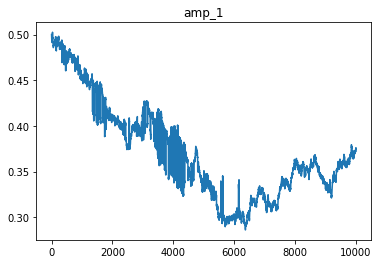

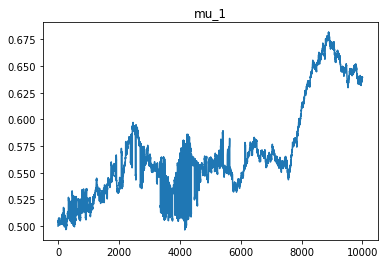

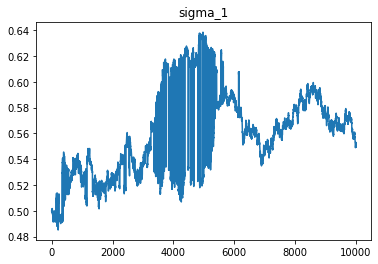

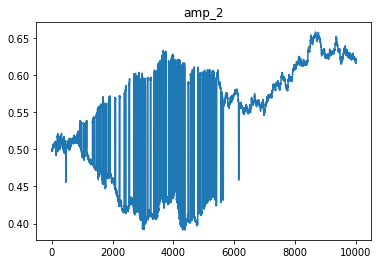

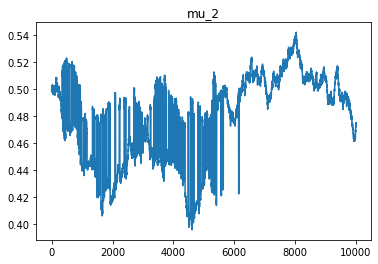

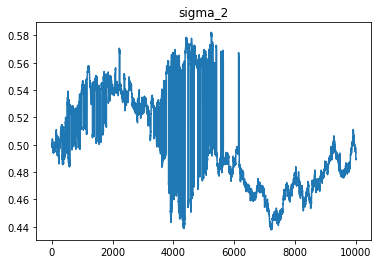

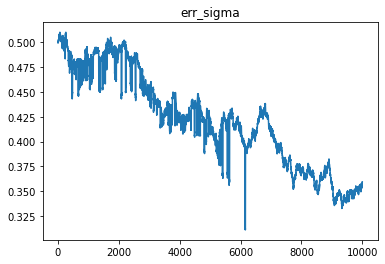

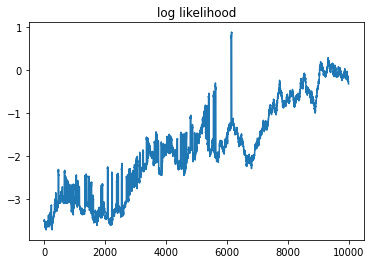

0.03162277660168379


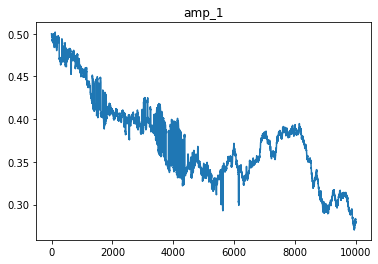

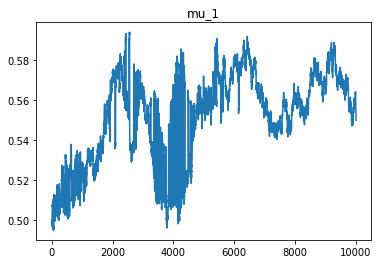

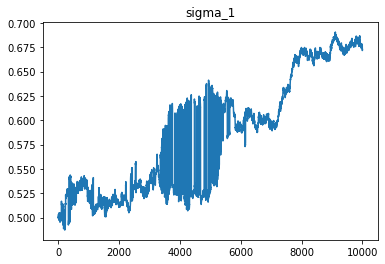

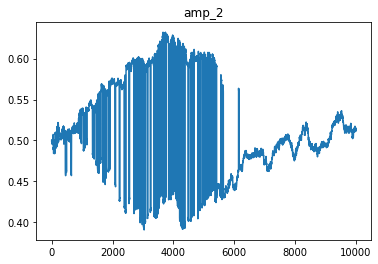

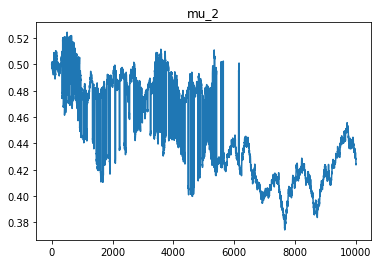

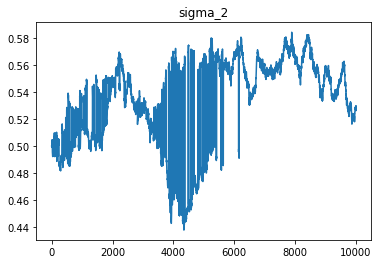

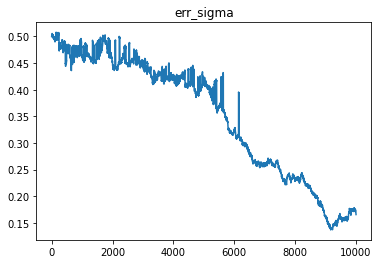

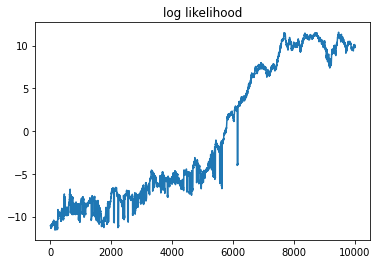

0.1


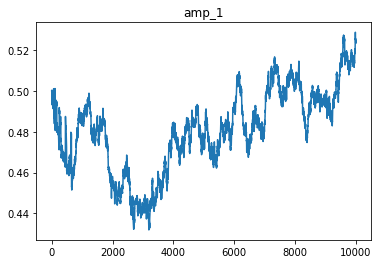

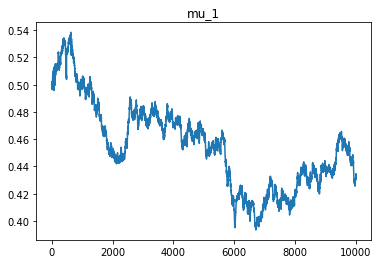

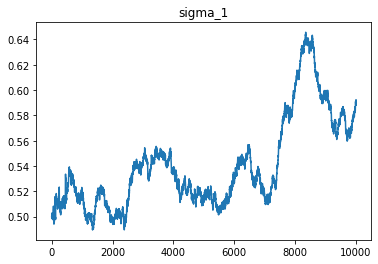

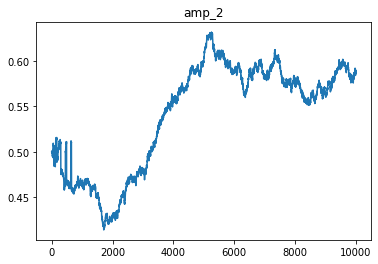

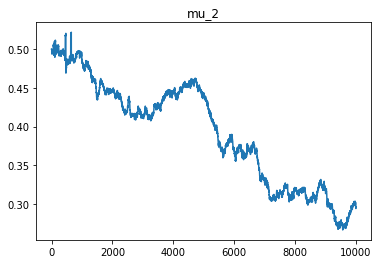

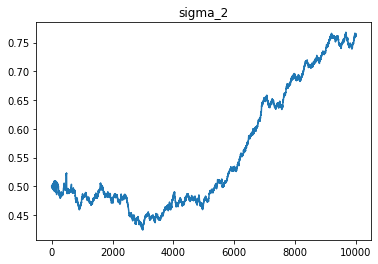

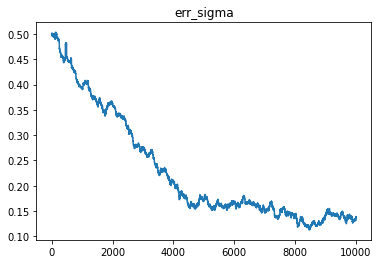

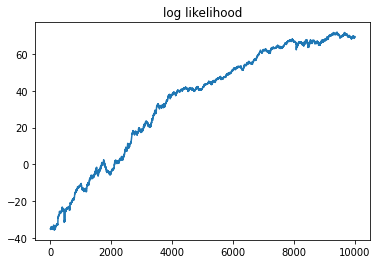

0.31622776601683794


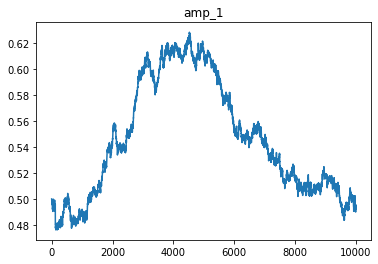

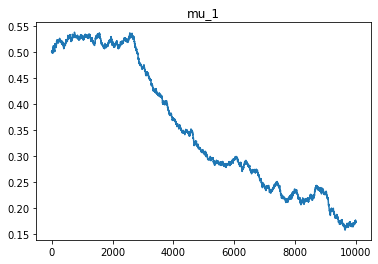

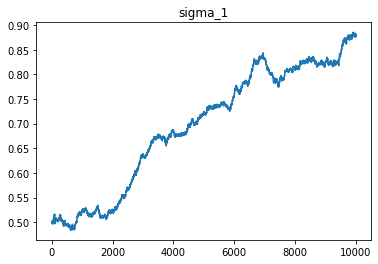

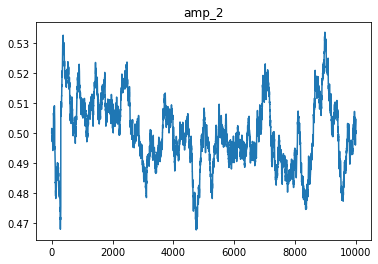

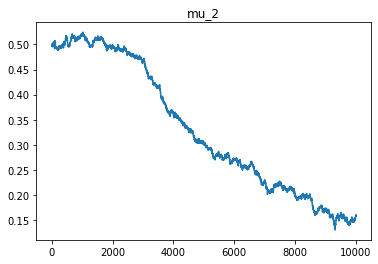

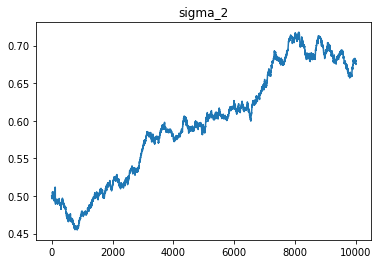

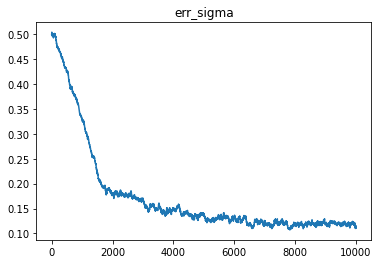

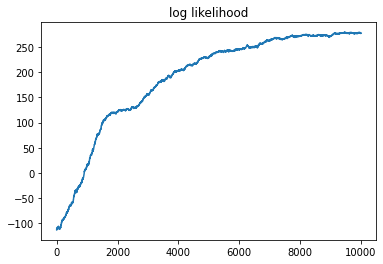

1.0


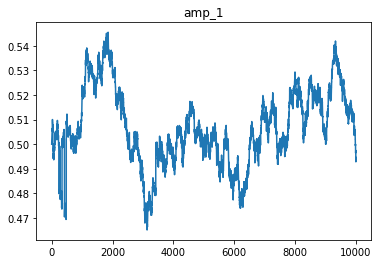

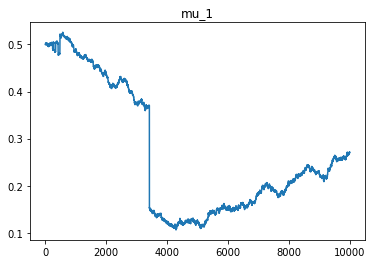

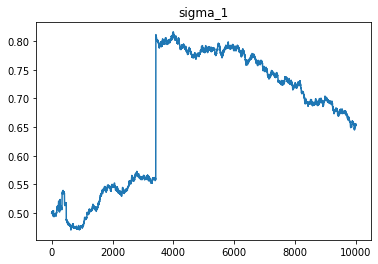

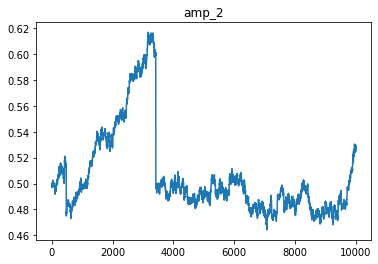

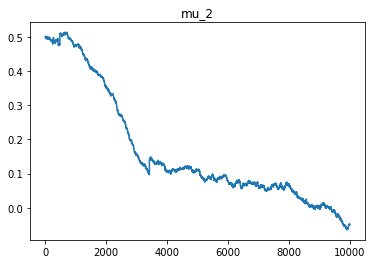

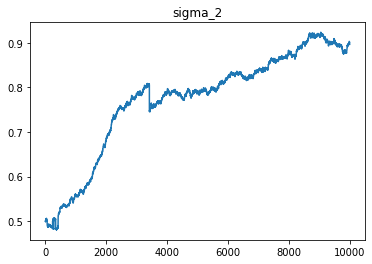

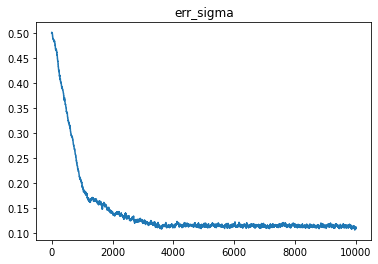

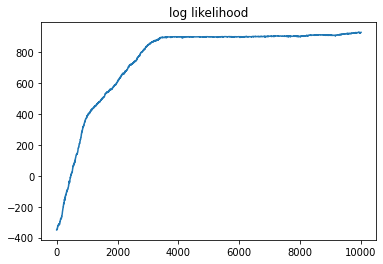

3.1622776601683795


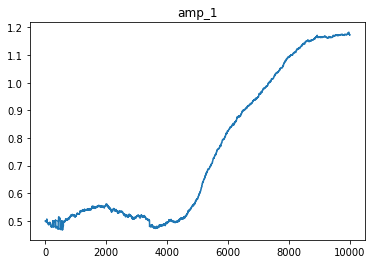

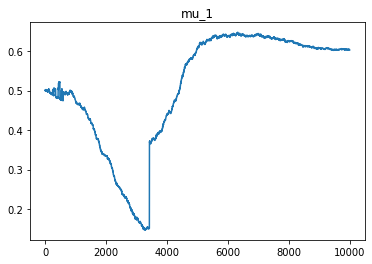

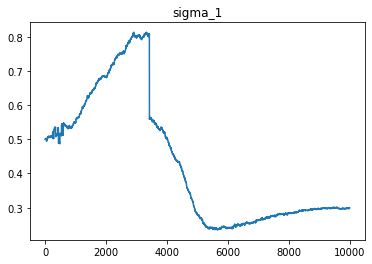

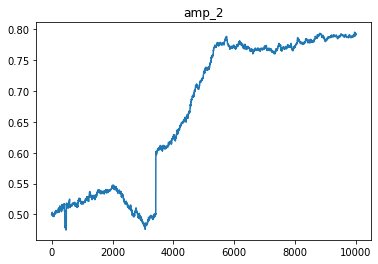

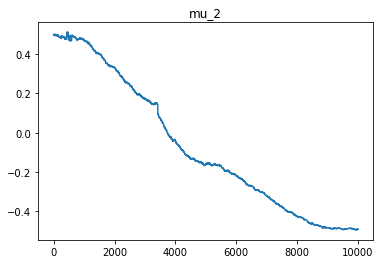

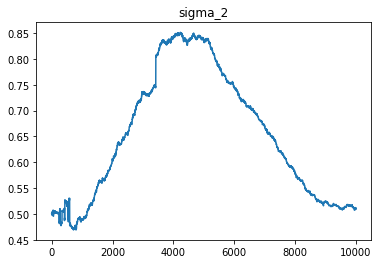

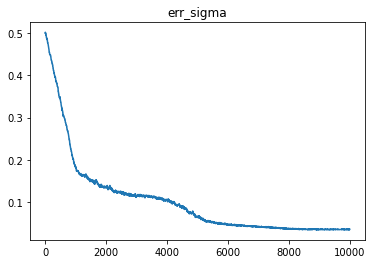

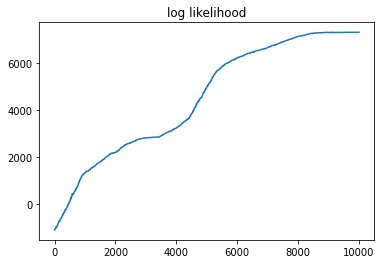

10.0


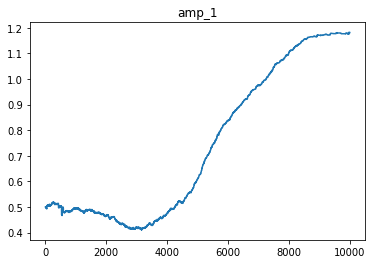

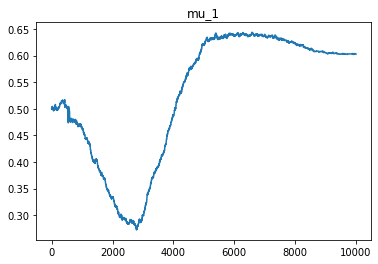

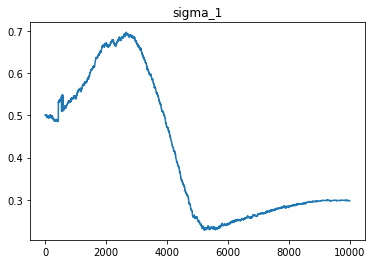

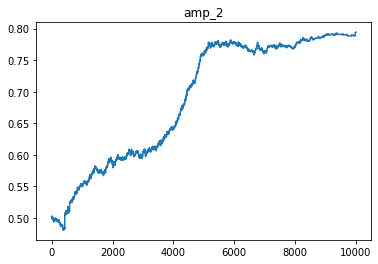

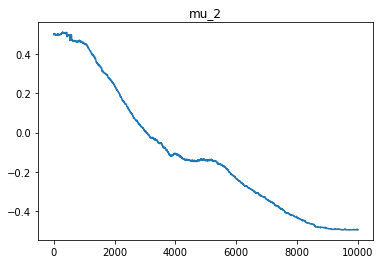

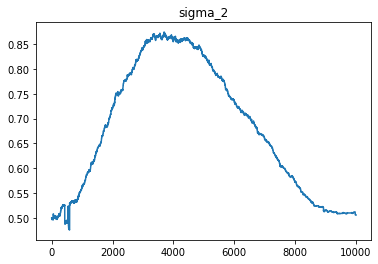

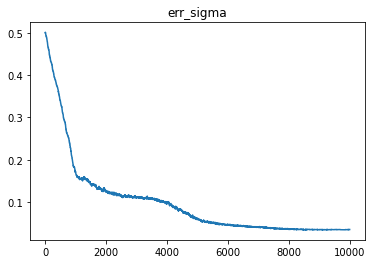

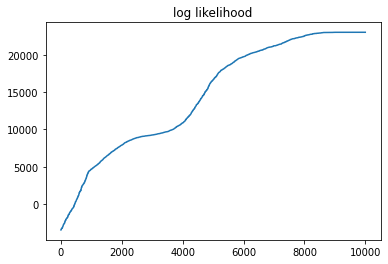

In [14]:
for beta in model.betas:
    print(beta)
    for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
        plt.plot(samples[beta][:, i])
        plt.title(name)
        plt.show()

    plt.plot(ll_samples[beta])
    plt.title("log likelihood")
    plt.show()

In [15]:
#model = curve_fit.ReplicaExchange(func, X, Y, [0.5]*7, [1e-3]*7, betas=10**np.arange(-2,1.5,0.5), prior_prob=prior_prob)

model.sampling(10**5)

In [16]:
samples = {beta: np.array(model.samples[beta]) for beta in model.betas}
ll_samples = {beta: np.array(model.ll_samples[beta]) for beta in model.betas}

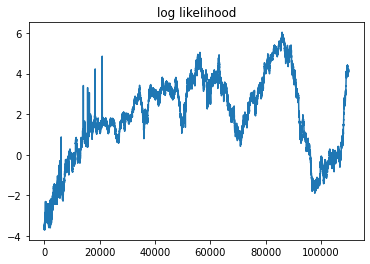

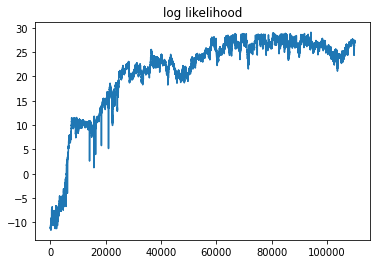

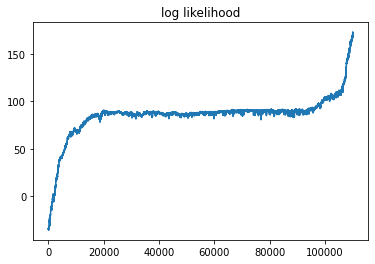

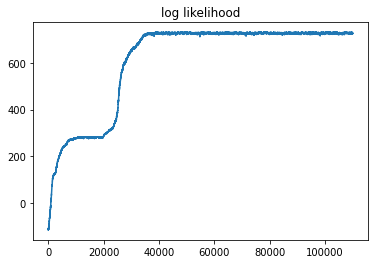

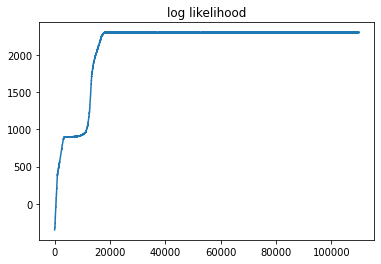

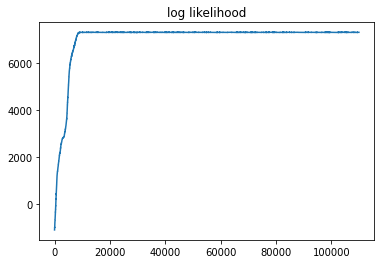

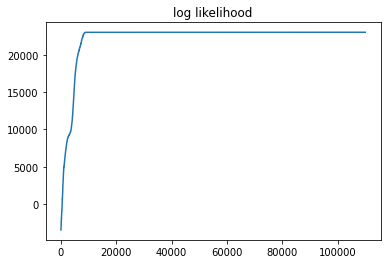

In [17]:
for beta in model.betas:
    plt.plot(ll_samples[beta])
    plt.title("log likelihood")
    plt.show()

0.01


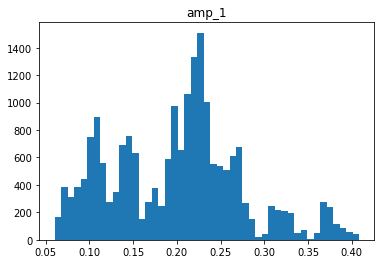

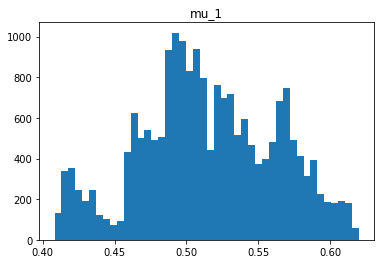

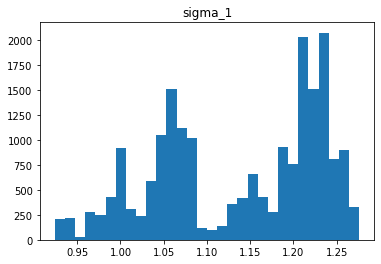

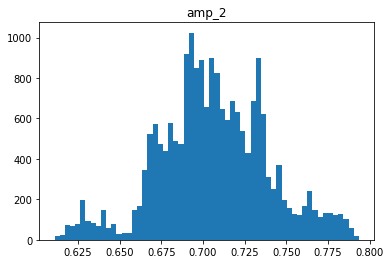

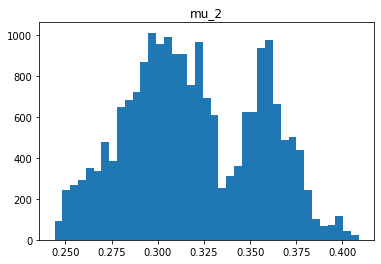

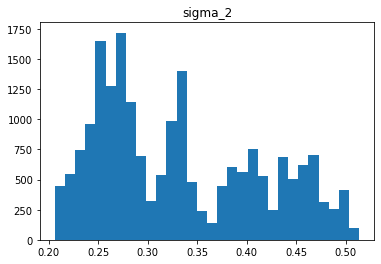

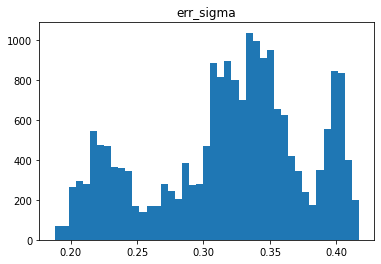

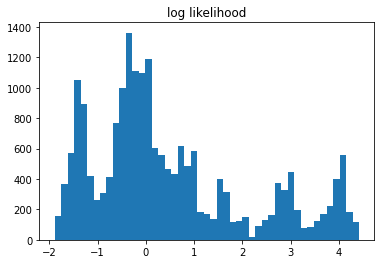

0.03162277660168379


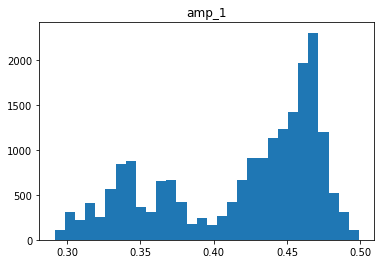

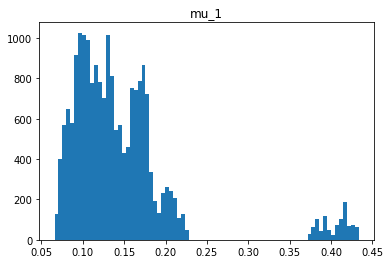

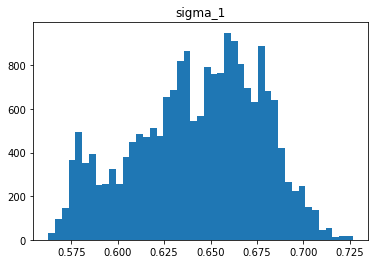

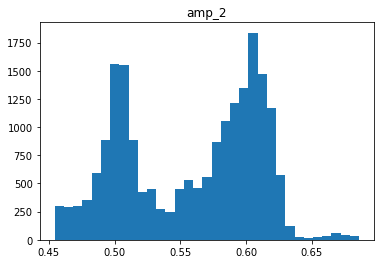

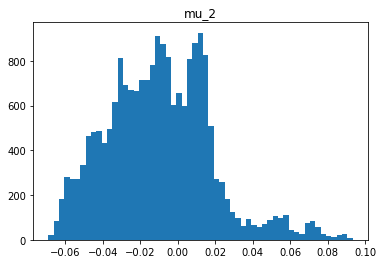

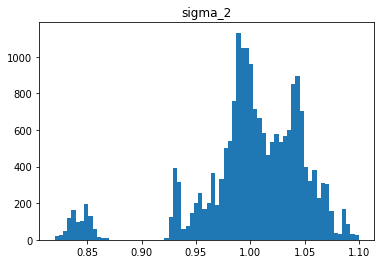

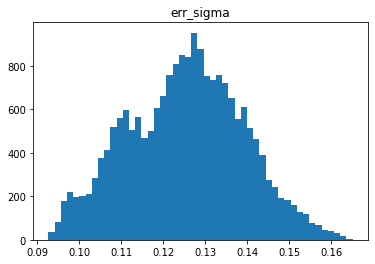

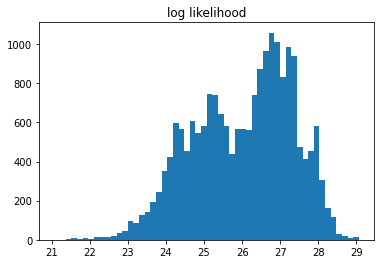

0.1


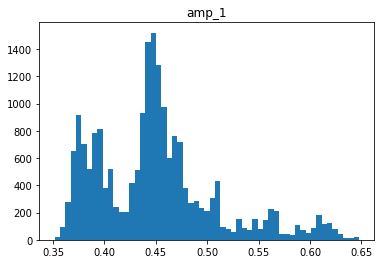

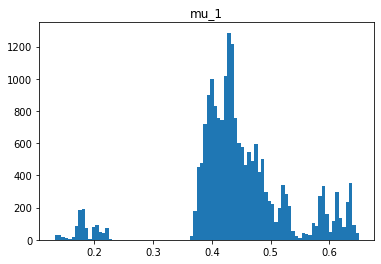

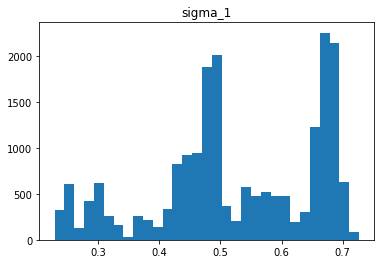

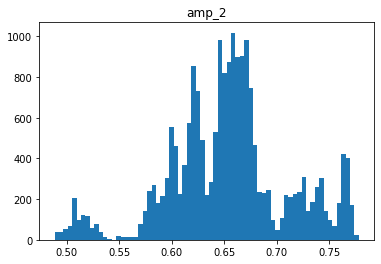

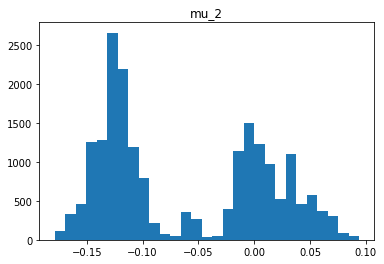

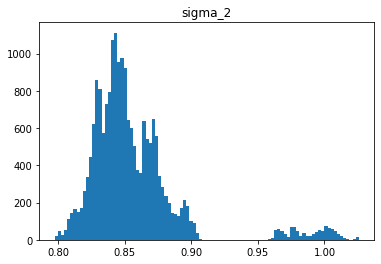

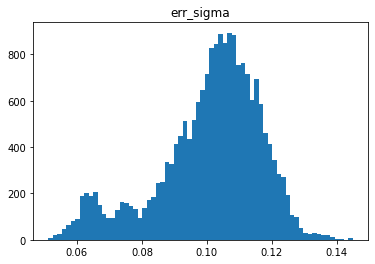

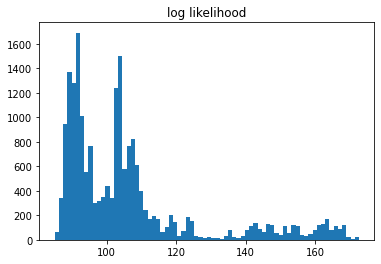

0.31622776601683794


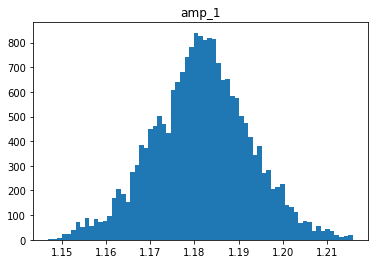

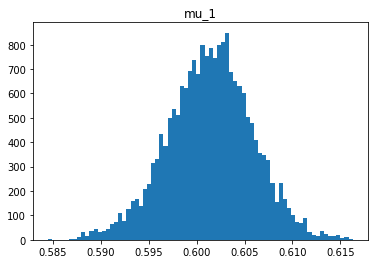

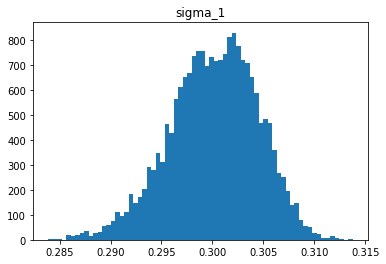

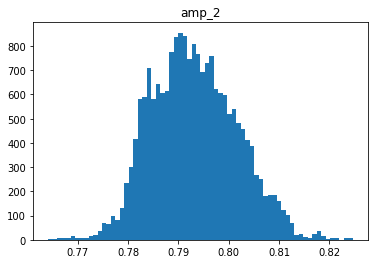

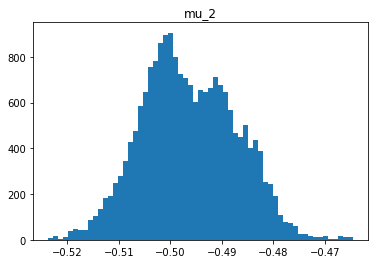

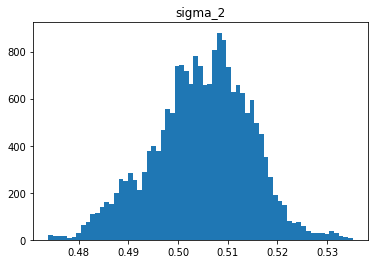

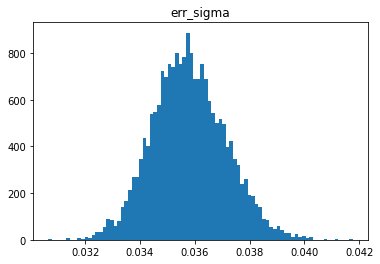

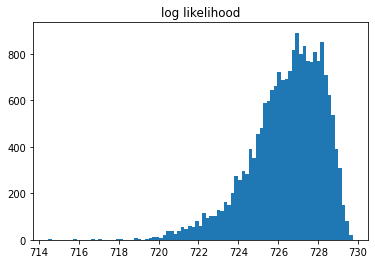

1.0


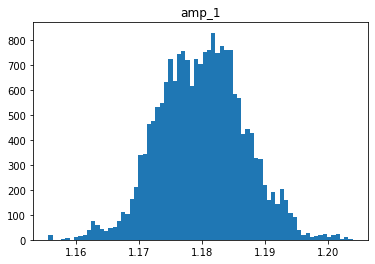

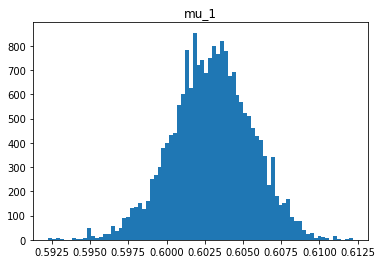

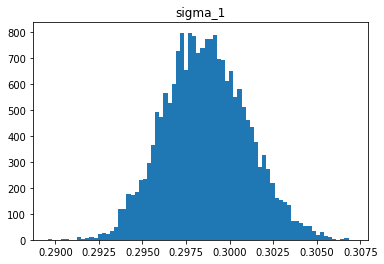

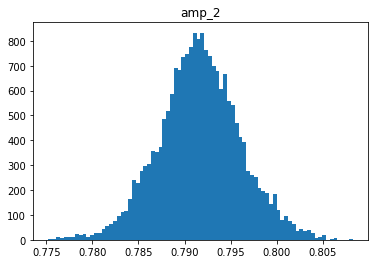

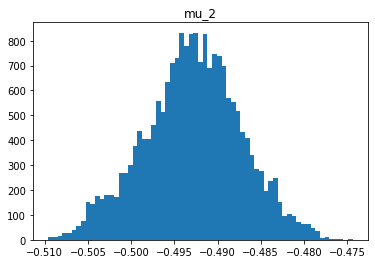

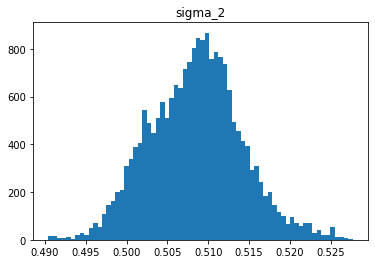

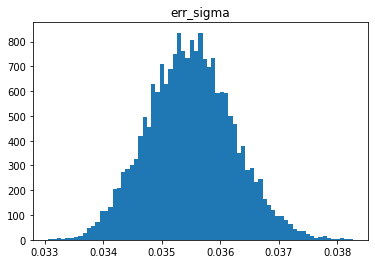

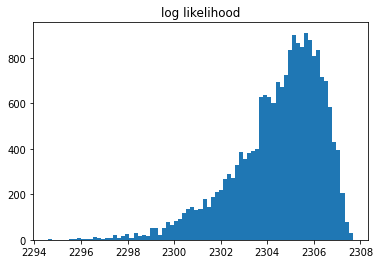

3.1622776601683795


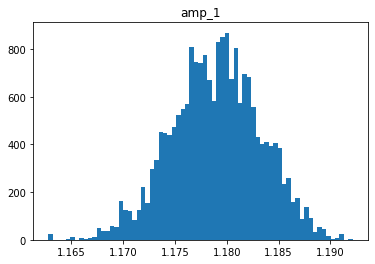

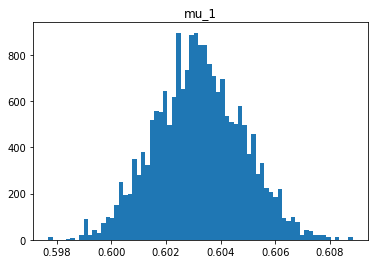

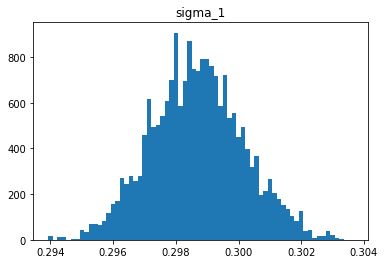

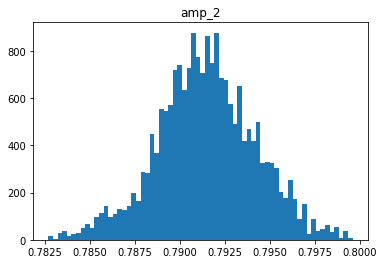

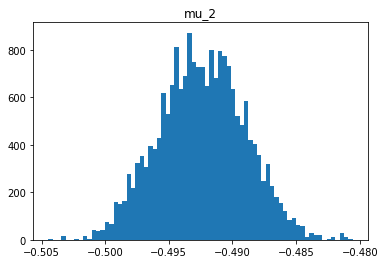

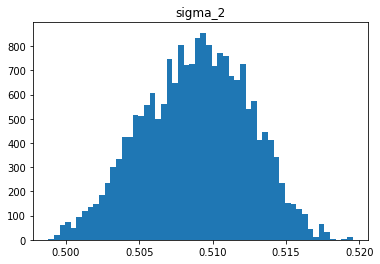

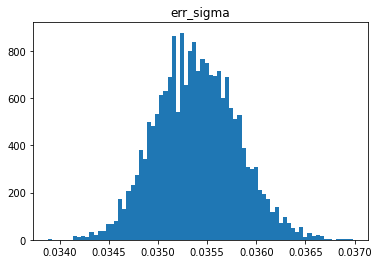

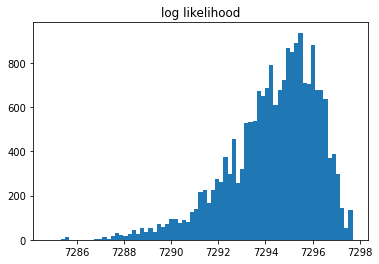

10.0


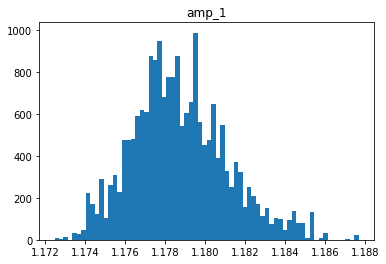

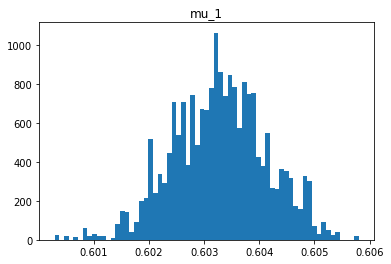

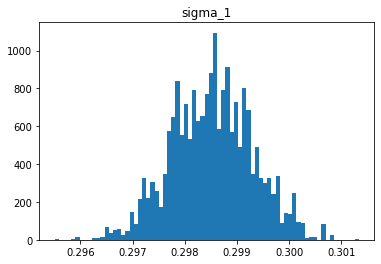

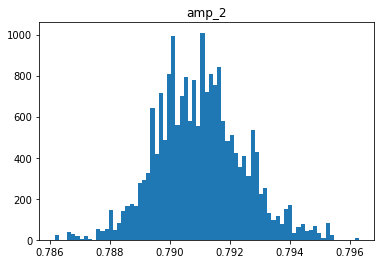

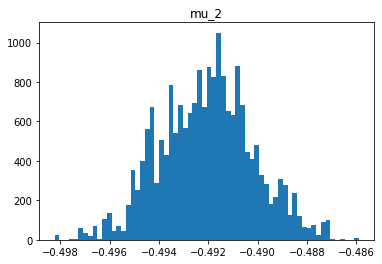

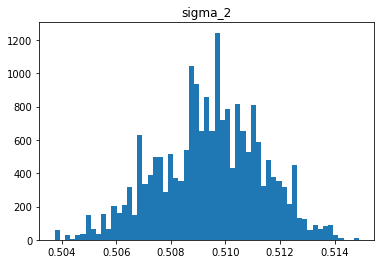

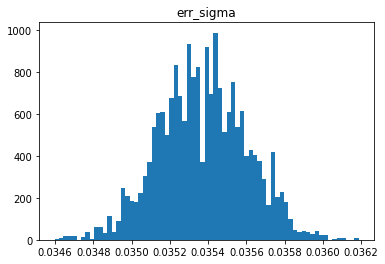

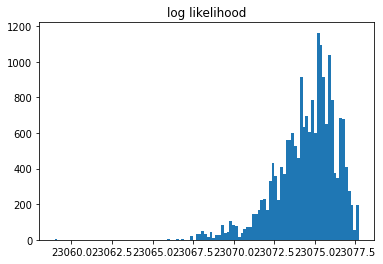

In [18]:
burnin = 10**5-10**4
for beta in model.betas:
    print(beta)
    for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
        plt.hist(samples[beta][burnin:, i], bins='auto')
        plt.title(name)
        plt.show()

    plt.hist(ll_samples[beta][burnin:], bins='auto')
    plt.title("log likelihood")
    plt.show()